In [1]:
get_ipython().system('pip install shap')

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import shap 
import pickle


In [3]:
data = pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
x=data.drop("target",axis=1)
y=data["target"]
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [5]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [18]:

selector = SelectKBest(f_classif, k=13) 
x_selected = selector.fit_transform(x_scaled, y)

In [64]:
x_train, x_temp, y_train, y_temp = train_test_split(x_selected, y, test_size=0.8, random_state=40) # training
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.9, random_state=40) # validation

In [65]:

param_grid = {
    "n_estimators": [200],
    "max_depth": [20],
    "min_samples_split": [5],
    "min_samples_leaf": [2]}

In [66]:

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print(best_model)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)


In [67]:
y_pred = best_model.predict(x_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print("ROC AUC:", roc_auc_score(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        41
           1       0.91      0.71      0.79        41

    accuracy                           0.82        82
   macro avg       0.83      0.82      0.81        82
weighted avg       0.83      0.82      0.81        82

[[38  3]
 [12 29]]
ROC AUC: 0.8170731707317074


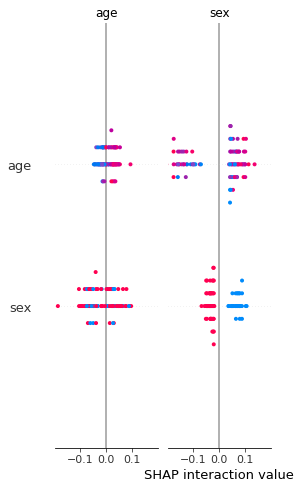

In [68]:

explainer = shap.Explainer(best_model)
shap_values = explainer(x_val)
shap.summary_plot(shap_values, x_val, feature_names=x.columns)


In [69]:
final_test_pred = best_model.predict(x_test)
final_test_auc = roc_auc_score(y_test, final_test_pred)
print("Final Test ROC AUC:", final_test_auc)

Final Test ROC AUC: 0.8711985688729875


In [70]:
with open ("shreyas.pkl","wb") as f:
    pickle.dump(best_model,f)


In [71]:
model = pickle.load(open("shreyas.pkl","rb"))

In [72]:
print(model.predict([[65, 0, 4, 244, 407, 0, 2, 156, 0, 3.6, 2, 3, 5]]))

[0]


In [79]:
df=pd.read_csv(r'C:\Users\shrey\OneDrive\Desktop\heart.csv')
y_test_cols=df.drop('target',axis=1)
y_test_3=y_test_cols[535:550]

In [80]:

y_test_3=scaler.transform(y_test_3)
print(model.predict(y_test_3))

[1 1 1 0 0 0 1 1 0 1 1 0 1 1 0]
